In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Data Processing

In [112]:
names = ['age', 'sex',  'cp', 'trestbps',  'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [127]:
# Load the dataset
df = pd.read_csv('./processed.cleveland.data', names = names)

# Convert all columns to numeric values, ignoring errors
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(axis=0, inplace=True)

In [114]:
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6

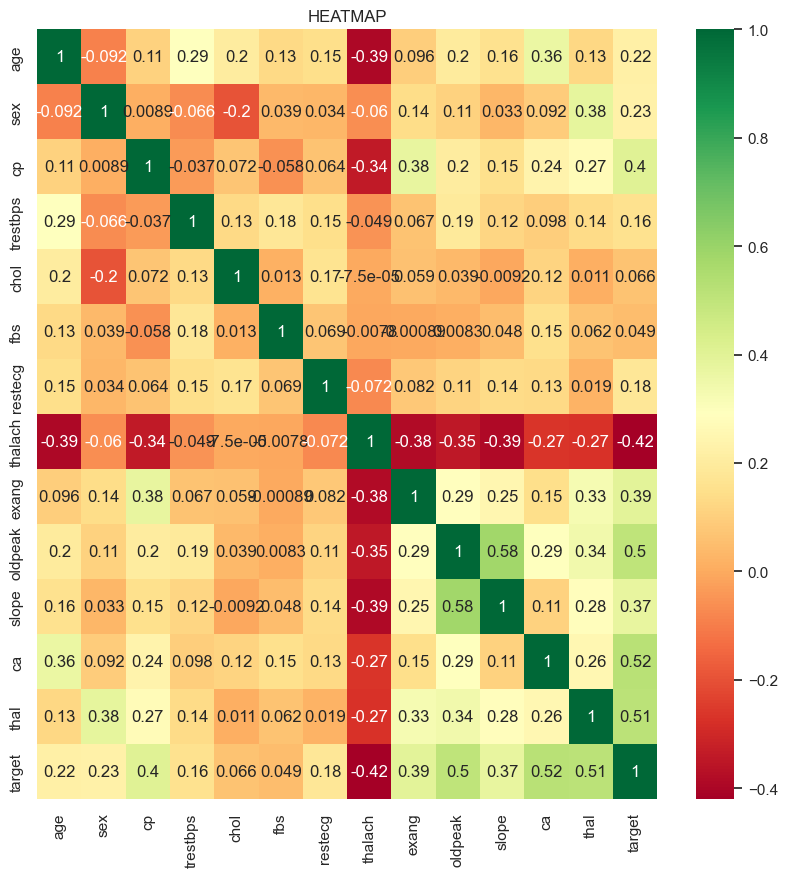

In [129]:
# Compute the correlation matrix
cor=df.corr()
top_corr_feature=cor.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

In [118]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print (to_drop)


[]


In [116]:
df=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
print (df)

      age  trestbps   chol  thalach  oldpeak  target  sex_0.0  sex_1.0  \
0    63.0     145.0  233.0    150.0      2.3       0        0        1   
1    67.0     160.0  286.0    108.0      1.5       2        0        1   
2    67.0     120.0  229.0    129.0      2.6       1        0        1   
3    37.0     130.0  250.0    187.0      3.5       0        0        1   
4    41.0     130.0  204.0    172.0      1.4       0        1        0   
..    ...       ...    ...      ...      ...     ...      ...      ...   
297  57.0     140.0  241.0    123.0      0.2       1        1        0   
298  45.0     110.0  264.0    132.0      1.2       1        0        1   
299  68.0     144.0  193.0    141.0      3.4       2        0        1   
300  57.0     130.0  131.0    115.0      1.2       3        0        1   
301  57.0     130.0  236.0    174.0      0.0       1        1        0   

     cp_1.0  cp_2.0  ...  slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  \
0         1       0  ...          

In [117]:
sc=StandardScaler()
to_scale=['age','trestbps','chol','thalach','oldpeak']
df[to_scale]=sc.fit_transform(df[to_scale])
print (df)

          age  trestbps      chol   thalach   oldpeak  target  sex_0.0  \
0    0.936181  0.750380 -0.276443  0.017494  1.068965       0        0   
1    1.378929  1.596266  0.744555 -1.816334  0.381773       2        0   
2    1.378929 -0.659431 -0.353500 -0.899420  1.326662       1        0   
3   -1.941680 -0.095506  0.051047  1.633010  2.099753       0        0   
4   -1.498933 -0.095506 -0.835103  0.978071  0.295874       0        1   
..        ...       ...       ...       ...       ...     ...      ...   
297  0.272059  0.468418 -0.122330 -1.161395 -0.734914       1        1   
298 -1.056185 -1.223355  0.320744 -0.768432  0.124076       1        0   
299  1.489615  0.693988 -1.047008 -0.375469  2.013854       2        0   
300  0.272059 -0.095506 -2.241384 -1.510696  0.124076       3        0   
301  0.272059 -0.095506 -0.218651  1.065396 -0.906712       1        1   

     sex_1.0  cp_1.0  cp_2.0  ...  slope_1.0  slope_2.0  slope_3.0  ca_0.0  \
0          1       1       0  ...

## Split dataset

In [119]:
y=df['target']
X=df.drop(['target'],axis=1)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Define the model and train

In [120]:
# Training the model using Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

## Perform Cross-validation

In [121]:
# Define the cross-validation fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the model
scores = cross_val_score(classifier, X_train, y_train, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.48888889 0.53333333 0.61363636 0.61363636 0.52272727]
Average score: 0.5544444444444444


In [122]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

## Evaluation Results

In [123]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 56.00%
